In [2]:
import sys
#sys.path.insert(0, '../..')
from IPython import get_ipython
from IPython.lib.deepreload import reload

%load_ext autoreload
%autoreload 2
from aqua import Reader,catalogue, inspect_catalogue
from ocean3d import load_obs_data
from ocean3d import check_variable_name
from ocean3d import stratification
from ocean3d.ocean_circulation.multi_model.mld_spatial import mld_multi_model
from ocean3d.ocean_drifts.multi_model.trends import surface_trend

In [3]:
en4_reader = Reader(model='EN4', exp='en4', source="monthly")
en4_1 = en4_reader.retrieve(startdate="1990", enddate="1993")
en4_1 = check_variable_name(en4_1)
en4_2 = en4_reader.retrieve(startdate="2010", enddate="2013")
en4_2 = check_variable_name(en4_2)


ifs_nemo_historical_reader = Reader(model='IFS-NEMO', exp='historical-1990', source="lra-r100-monthly")
ifs_nemo_historical = ifs_nemo_historical_reader.retrieve(startdate="1990", enddate="1993")
ifs_nemo_historical = check_variable_name(ifs_nemo_historical)

ifs_nemo_ssp370_reader = Reader(model='IFS-NEMO', exp='ssp370', source="lra-r100-monthly")
ifs_nemo_ssp370 = ifs_nemo_ssp370_reader.retrieve(startdate="2020", enddate="2023")
ifs_nemo_ssp370 = check_variable_name(ifs_nemo_ssp370)

icon_ssp370_reader = Reader(model='ICON', exp='ssp370', source="lra-r100-monthly")
icon_ssp370 = icon_ssp370_reader.retrieve(startdate="2000", enddate="2023")
icon_ssp370 = check_variable_name(icon_ssp370)

icon_historical_reader = Reader(model='ICON', exp='historical-1990', source="lra-r100-monthly")
icon_historical = icon_historical_reader.retrieve(startdate="1990", enddate="1993")
icon_historical = check_variable_name(icon_historical)


2024-04-05 13:19:00 :: Reader :: WARNING  -> DATA_PATH parameter is required but is missing, setting to default /pfs/lustrep3/projappl/project_465000454/data/AQUA/datasets


2024-04-05 13:19:04 :: Reader :: ERROR    -> Variable time_bnds has no units!
2024-04-05 13:19:04 :: Reader :: ERROR    -> Variable lon_bnds has no units!
2024-04-05 13:19:04 :: Reader :: ERROR    -> Variable lat_bnds has no units!
2024-04-05 13:19:04 :: Reader :: ERROR    -> Variable lev_bnds has no units!
2024-04-05 13:19:04 :: Unit :: WARNING  -> The unit of Pot. Temperature is Kelvin. Converting to degC
2024-04-05 13:19:04 :: Reader :: ERROR    -> Variable time_bnds has no units!
2024-04-05 13:19:04 :: Reader :: ERROR    -> Variable lon_bnds has no units!
2024-04-05 13:19:04 :: Reader :: ERROR    -> Variable lat_bnds has no units!
2024-04-05 13:19:04 :: Reader :: ERROR    -> Variable lev_bnds has no units!
2024-04-05 13:19:04 :: Unit :: WARNING  -> The unit of Pot. Temperature is Kelvin. Converting to degC
2024-04-05 13:19:04 :: Reader :: WARNING  -> DATA_PATH parameter is required but is missing, setting to default /pfs/lustrep3/projappl/project_465000454/data/AQUA/datasets
2024-0

In [4]:
data_dict = {'EN4 1':ifs_nemo_ssp370,
             'EN4 2':ifs_nemo_ssp370,
             'IFS-NEMO Historical':ifs_nemo_historical,
             'IFS-NEMO ssp370':ifs_nemo_ssp370,
             'icon ssp370':icon_historical,
             'icon Historical':icon_ssp370,
             } 
o3d_request= {'model':'IFS-NEMO',
'exp':'historical-1990',
'source': 'lra-r100-monthly',
'data_dict': data_dict,
'region':'Labrador Sea',
'latS':None,
'latN':None,
'lonW':None,
'lonE':None,
'output':True,
"time" : "February",
'output_dir':'./output'}

/opt/conda/lib/python3.11/site-packages/dask/array/reductions.py:654: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/opt/conda/lib/python3.11/site-packages/dask/array/reductions.py:654: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/opt/conda/lib/python3.11/site-packages/dask/array/numpy_compat.py:53: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/opt/conda/lib/python3.11/site-packages/dask/array/numpy_compat.py:53: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/opt/conda/lib/python3.1

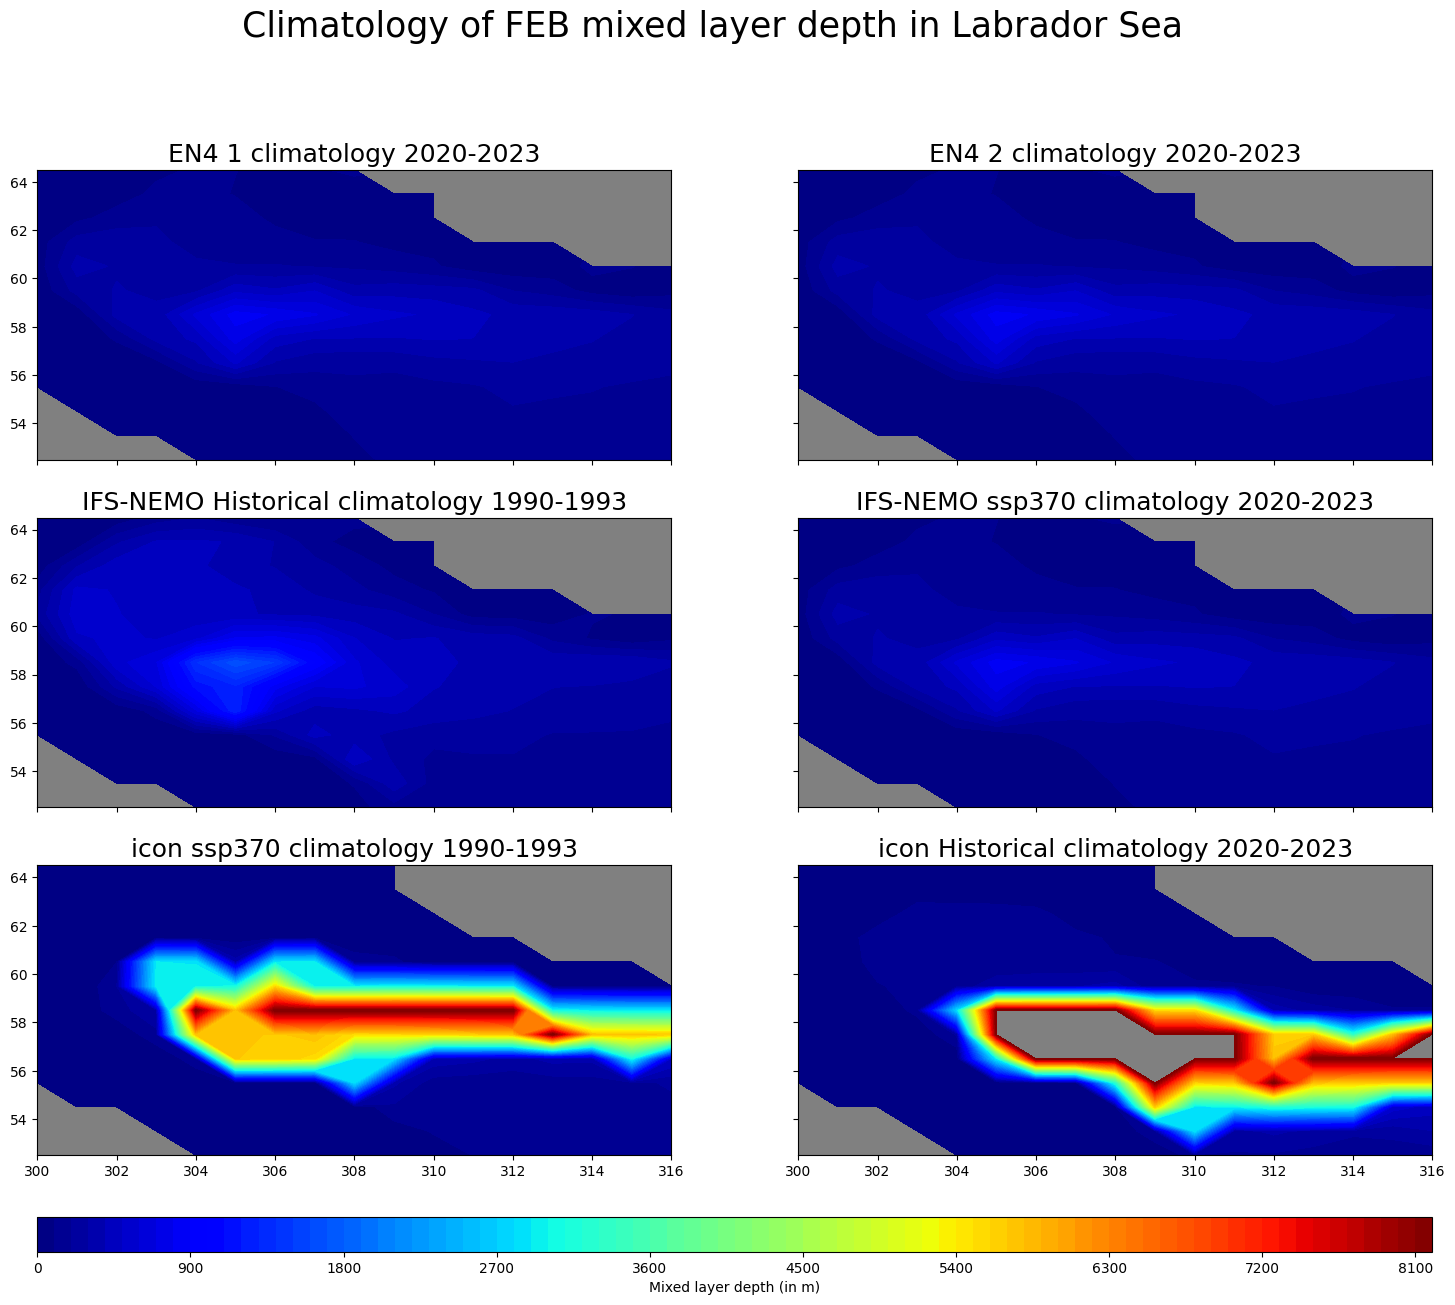

In [5]:
mld_multi_model(o3d_request)

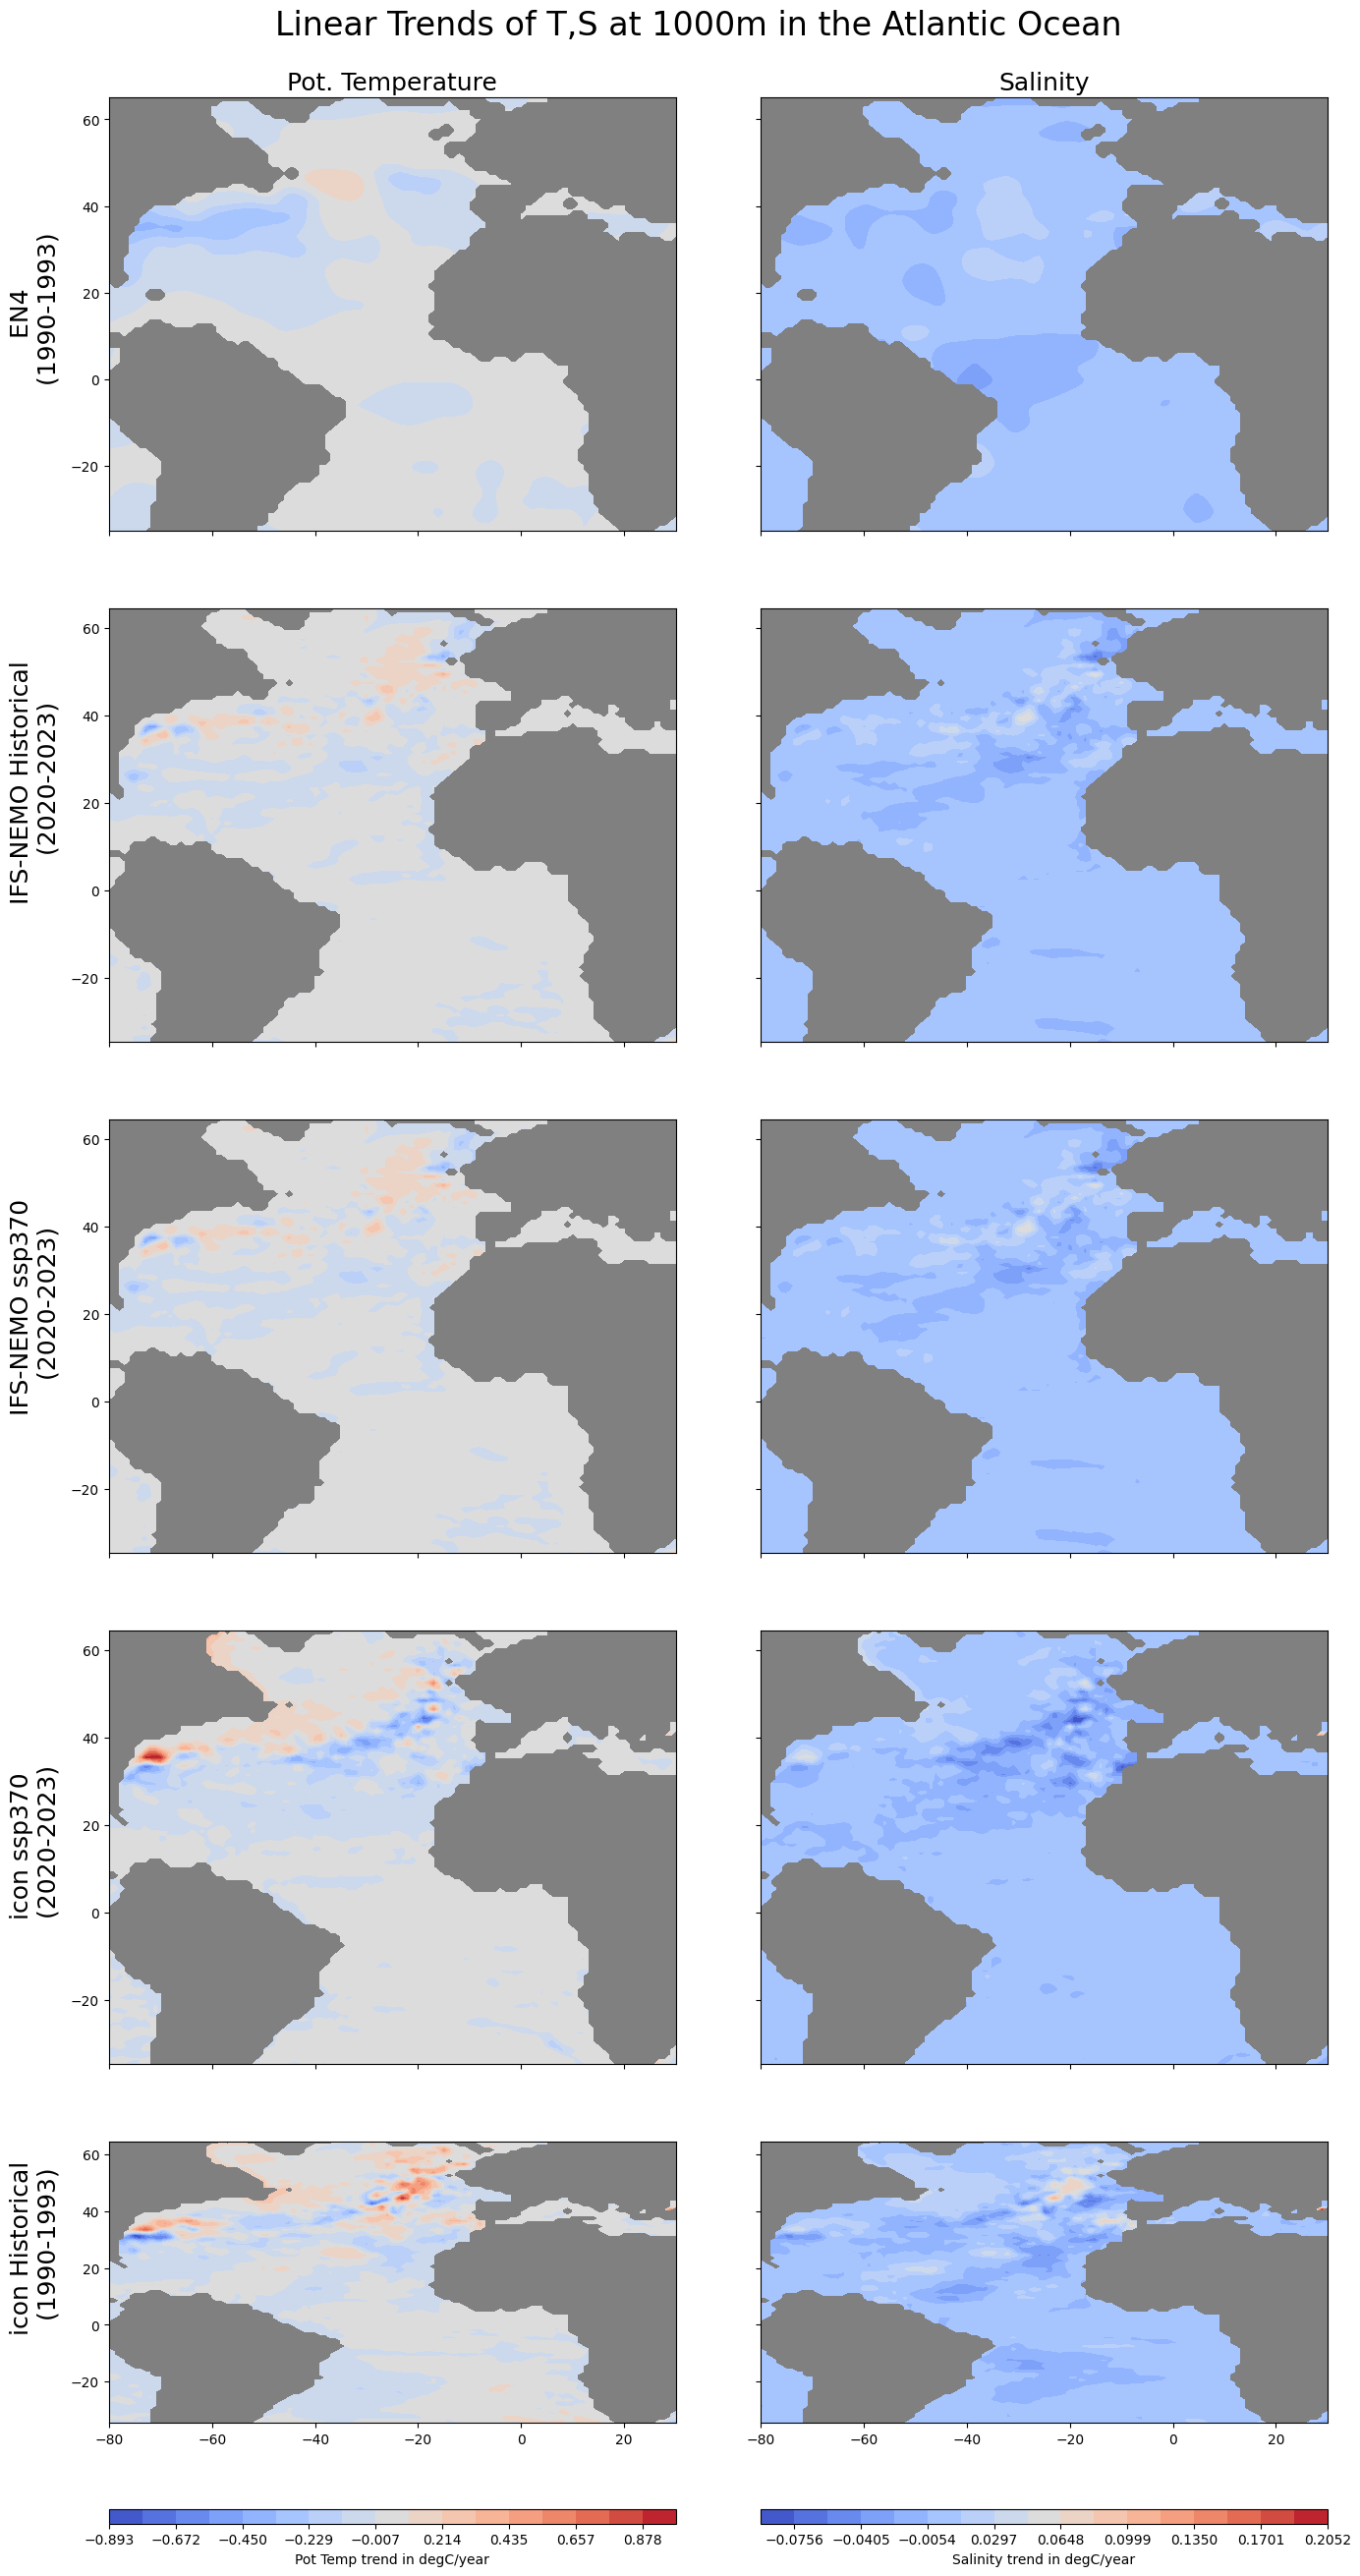

In [9]:
o3d_request["level"]=1000
o3d_request["region"]="Atlantic Ocean"
data_dict = {'EN4':en4_1,
             'IFS-NEMO Historical':ifs_nemo_ssp370,
             'IFS-NEMO ssp370':ifs_nemo_ssp370,
             'icon ssp370':icon_ssp370,
             'icon Historical':icon_historical,
             } 
o3d_request["data_dict"] = data_dict 

surface_trend_plot = surface_trend(o3d_request)
surface_trend_plot.plot()

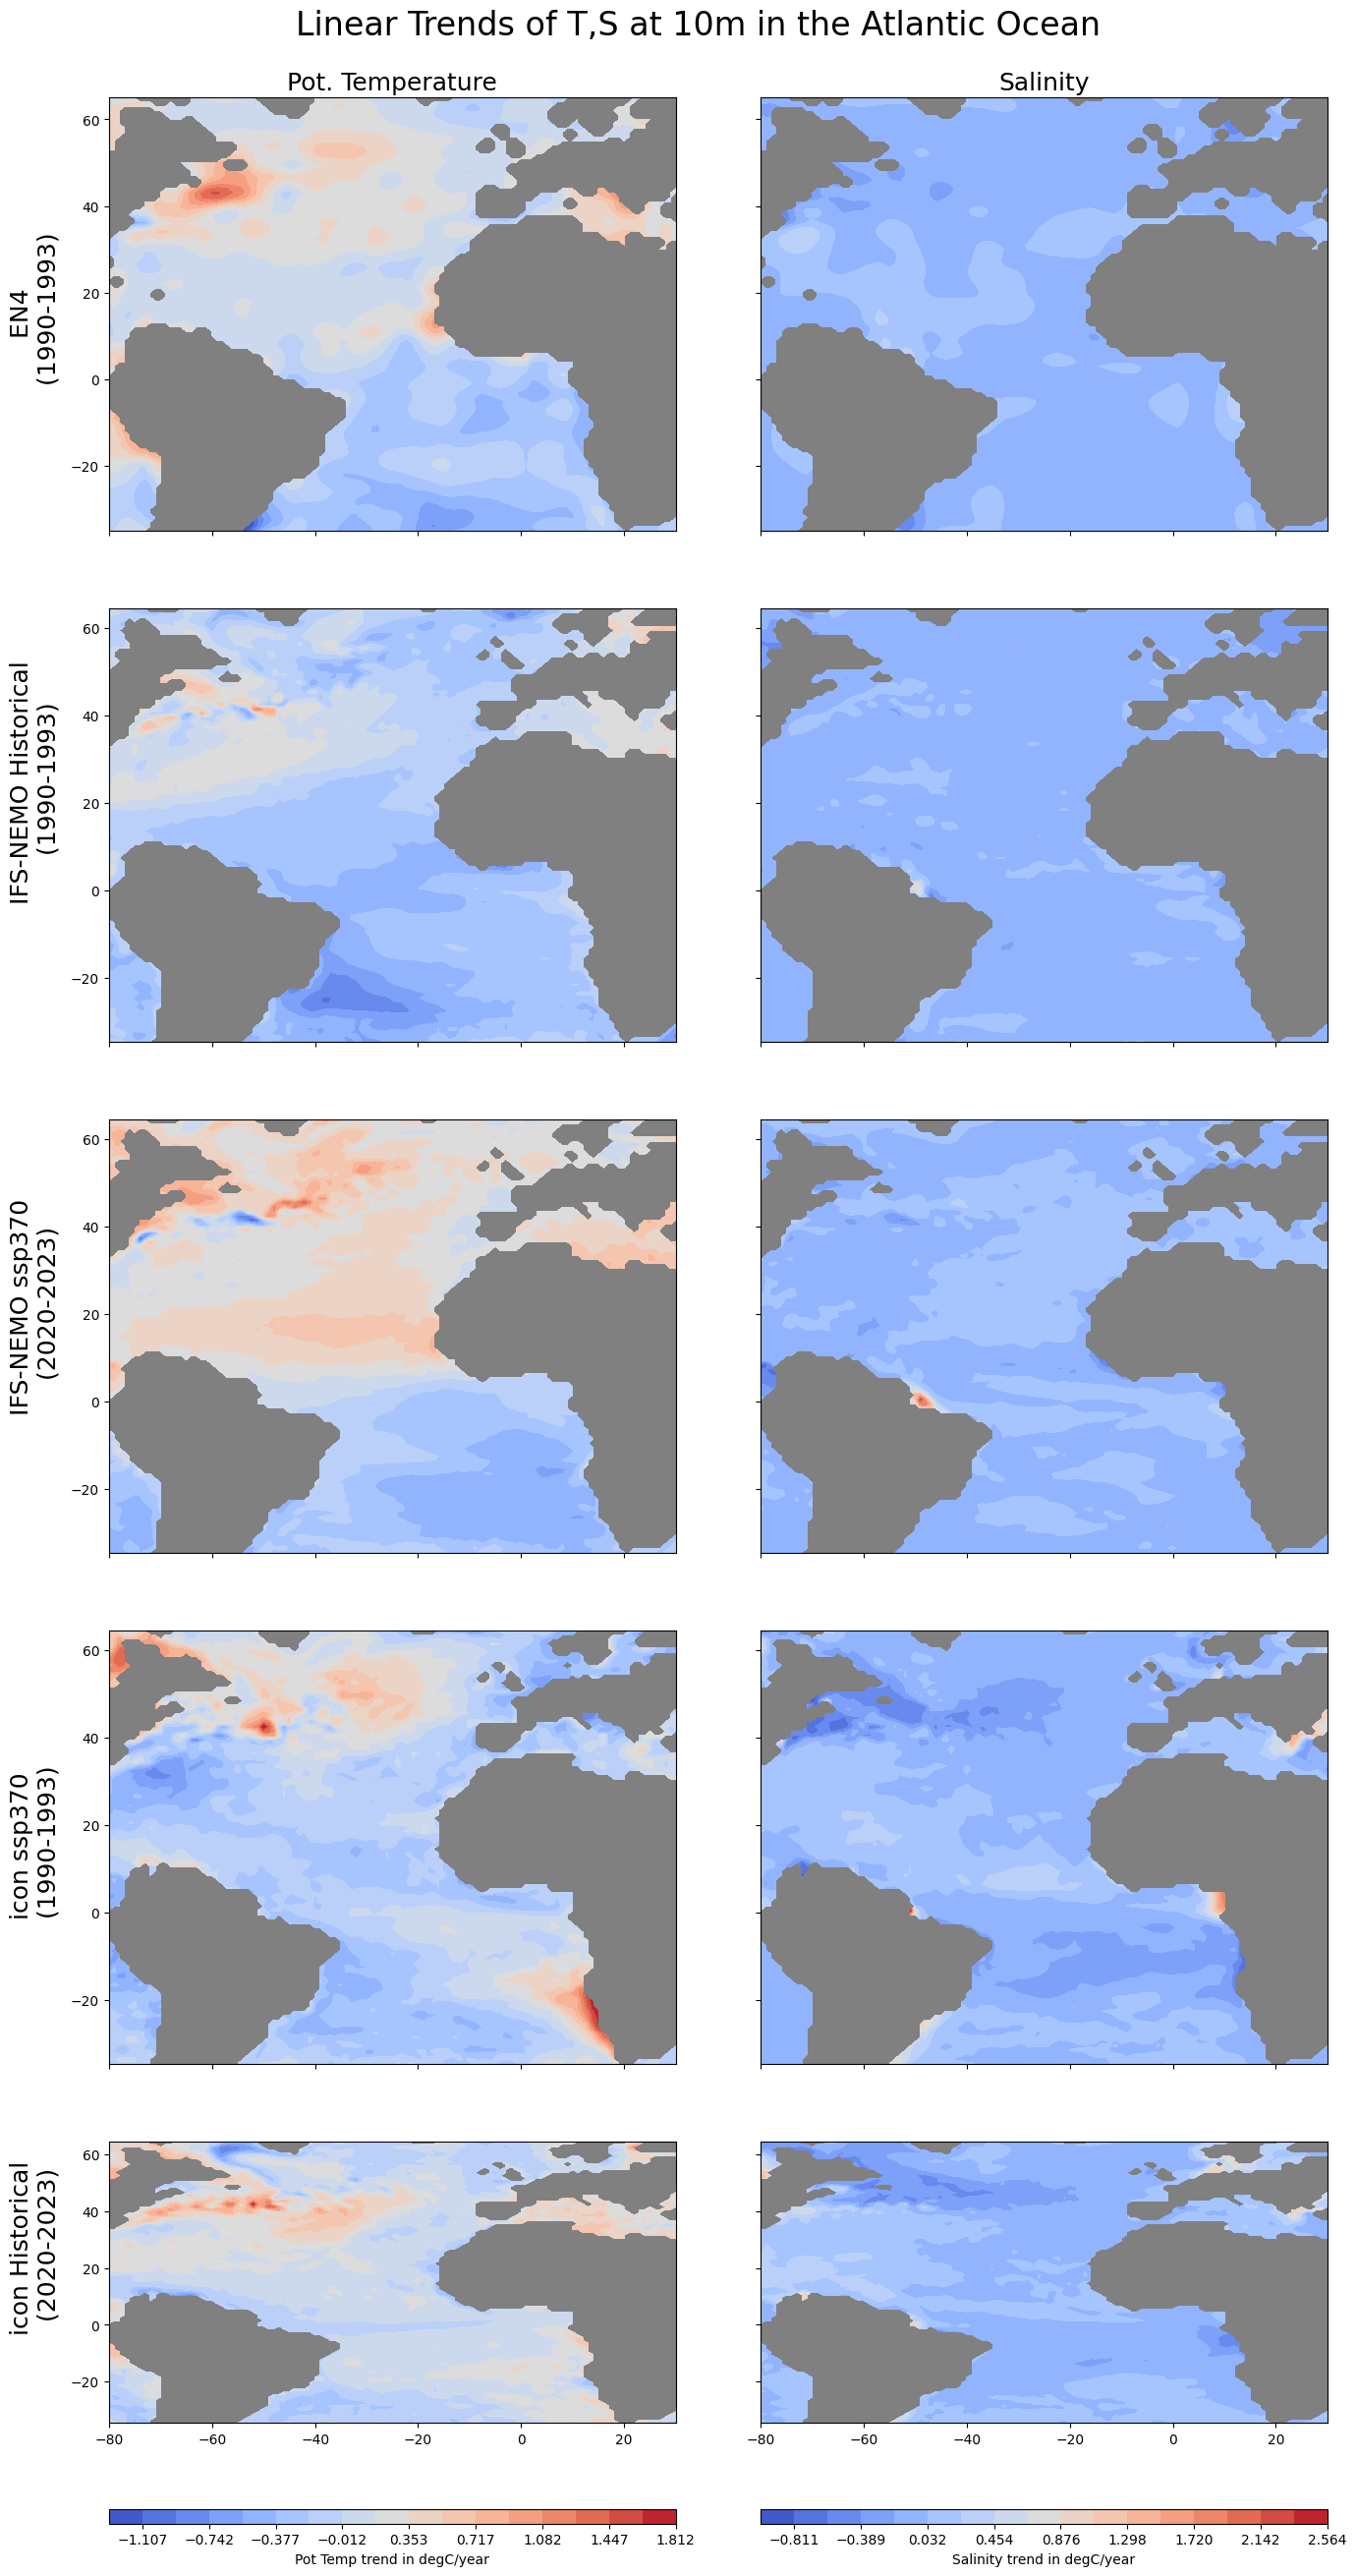

In [8]:
o3d_request["level"]=10
o3d_request["region"]="Atlantic Ocean"

data_dict = {'EN4':en4_1,
             'IFS-NEMO Historical':ifs_nemo_historical,
             'IFS-NEMO ssp370':ifs_nemo_ssp370,
             'icon ssp370':icon_historical,
             'icon Historical':icon_ssp370,
             } 
o3d_request["data_dict"] = data_dict

surface_trend_plot = surface_trend(o3d_request)
surface_trend_plot.plot()